In [1]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np
from collections import Counter

# Thư viện xử lý văn bản
import re
from nltk.tokenize import word_tokenize
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Thư viện học máy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Thư viện TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [5]:
folder_path = 'C:\\Users\\PC\\Documents\\GitHub\\NLP-HotelReviewsSentimentAnalysis\\Dataset\\'

# **1. EDA & PRE-PROCESSING DATA**

In [6]:
# Đọc dữ liệu và kiểm tra thuộc tính
eda_data = pd.read_csv(folder_path + 'Reviews.csv')

# In dữ liệu ban đầu
eda_data

,id,language,rating,additionalRatings,createdDate,helpfulVotes,username,userId,title,text,locationId,parentGeoId,hotelName,stayDate,tripType
0,654797953,vi,4,[],2019-02-25,1,Lephuchau,F31010A9913D4D5EF71C19943112119E,Một đêm khó ngủ,- Nằm ở số 4 Tôn Đức Thắng (trong khu villa ca...,14775963,651661,Hana Riverside Villa,2019-02-28,COUPLES
1,759960236,en,4,"[{'rating': 5, 'ratingLabel': 'Sự sạch sẽ'}, {...",2020-07-14,0,Lê T,5EEE52E4A46EB17EDB101F2687176104,Nice choice for short stay (hope the contructi...,"Hana Riverside Quang Ngai hotel, - Located in ...",14775963,651661,Hana Riverside Villa,2020-02-29,NONE
2,746020346,en,5,[],2020-02-18,0,Pipes79,9266F1E4EB6B7888598CAFA3CA535D94,Lovely stay,Dropped in here for 1 night on my way north. F...,14775963,651661,Hana Riverside Villa,2020-02-29,SOLO
3,710719324,en,4,[],2019-09-17,0,Chels2210,2930D0F21694986E614640B46EAC7FF6,Good room,Stayed here for one night while passing throug...,14775963,651661,Hana Riverside Villa,2019-09-30,COUPLES
4,658526310,vi,4,[],2019-03-14,0,Andy M,A1C68DD5908359E499974361DADF0117,Một công việc đang tiến triển - theo nghĩa đen.,"Khách sạn đẹp, nhân viên và các cơ sở nhưng cô...",14775963,651661,Hana Riverside Villa,2019-03-31,SOLO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62882,529028174,vi,5,[],2017-10-02,1,peter150881,8D07ECA38DDBA8817E93E9E0DBCEFB8E,Khách sạn tốt,Sau chuyến đi Sapa. . chúng tôi đã đi đến bình...,12799683,789432,Putaleng Hotel,2017-10-31,COUPLES
62883,527273004,nl,3,[],2017-09-25,1,RaffBnnr,FA156248E1720577890842CFBA6E8A97,Nieuw in de toerismebranche,Putalenghotel is een leuk hotel met vriendelij...,12799683,789432,Putaleng Hotel,2017-09-30,COUPLES
62884,522207067,nl,5,[],2017-09-07,2,Christof I,5F520F0F4F84788565EA76279637BAC0,Je voelt je deel van de familie,Gezellig hotel waar de hele familie in werkt. ...,12799683,789432,Putaleng Hotel,2017-09-30,COUPLES
62885,788473940,vi,5,[],2021-05-10,0,Jeremy L,63A02B46B7737043852CF3BE486B757F,Rất tuyệt vời cho chuyến công tác tại Đức Hòa ...,Tôi có chuyến công tác tại khu công nghiệp Hải...,23303565,23369392,Khách Sạn Phú Thắng,2021-04-30,BUSINESS


In [7]:
# Hiển thị thông tin cơ bản về dữ liệu
properties_check = pd.DataFrame({
    'Số quan sát': eda_data.count(),
    'Số giá trị unique': eda_data.nunique(),
    'Kiểu dữ liệu': eda_data.dtypes.values
})
print(properties_check)

                   Số quan sát  Số giá trị unique Kiểu dữ liệu
id                       62887              62887        int64
language                 62887                 14       object
rating                   62887                  5        int64
additionalRatings        62887               2546       object
createdDate              62887               4659       object
helpfulVotes             62887                 52        int64
username                 62424              54130       object
userId                   62432              56836       object
title                    62885              51910       object
text                     62887              62863       object
locationId               62887               1497        int64
parentGeoId              62887                185        int64
hotelName                62887               1470       object
stayDate                 62887                202       object
tripType                 62887                  6      

In [8]:
# Lọc dữ liệu tiếng Việt và chọn các cột cần thiết
eda_data = eda_data[eda_data['language'] == 'vi'][['rating', 'title', 'text']].drop_duplicates().dropna()

In [9]:
eda_data

,rating,title,text
0,4,Một đêm khó ngủ,- Nằm ở số 4 Tôn Đức Thắng (trong khu villa ca...
4,4,Một công việc đang tiến triển - theo nghĩa đen.,"Khách sạn đẹp, nhân viên và các cơ sở nhưng cô..."
7,1,không có một chút nào là thoải mái,tham quan để giới thiệu cho khu này thì bắt bu...
8,5,Tuyệt vời và Nghỉ dưỡng số 1 Quảng Ngãi,Tôi có dịp công tác tại Quảng Ngãi và được giớ...
9,5,Một nơi nghỉ dưỡng tuyệt vời.,"Resort mới khai trương nên còn vắng vẻ, yên tĩ..."
...,...,...,...
62873,5,"khách sạn mới chuẩn 5 sao, gần biển view đep",điều ấn tượng đầu tiên là khách sạn sát ngay b...
62881,4,Khách sạn tốt duy nhất ở Tam Dương,Các khách sạn Putaleng là thương hiệu mới vì v...
62882,5,Khách sạn tốt,Sau chuyến đi Sapa. . chúng tôi đã đi đến bình...
62885,5,Rất tuyệt vời cho chuyến công tác tại Đức Hòa ...,Tôi có chuyến công tác tại khu công nghiệp Hải...


In [10]:
# Gắn nhãn sentiment
eda_data['sentiment'] = eda_data['rating'].apply(lambda x: 'negative' if x < 3 else 'positive' if x > 3 else 'neutral')

# In dữ liệu sau có nhãn
eda_data

,rating,title,text,sentiment
0,4,Một đêm khó ngủ,- Nằm ở số 4 Tôn Đức Thắng (trong khu villa ca...,positive
4,4,Một công việc đang tiến triển - theo nghĩa đen.,"Khách sạn đẹp, nhân viên và các cơ sở nhưng cô...",positive
7,1,không có một chút nào là thoải mái,tham quan để giới thiệu cho khu này thì bắt bu...,negative
8,5,Tuyệt vời và Nghỉ dưỡng số 1 Quảng Ngãi,Tôi có dịp công tác tại Quảng Ngãi và được giớ...,positive
9,5,Một nơi nghỉ dưỡng tuyệt vời.,"Resort mới khai trương nên còn vắng vẻ, yên tĩ...",positive
...,...,...,...,...
62873,5,"khách sạn mới chuẩn 5 sao, gần biển view đep",điều ấn tượng đầu tiên là khách sạn sát ngay b...,positive
62881,4,Khách sạn tốt duy nhất ở Tam Dương,Các khách sạn Putaleng là thương hiệu mới vì v...,positive
62882,5,Khách sạn tốt,Sau chuyến đi Sapa. . chúng tôi đã đi đến bình...,positive
62885,5,Rất tuyệt vời cho chuyến công tác tại Đức Hòa ...,Tôi có chuyến công tác tại khu công nghiệp Hải...,positive


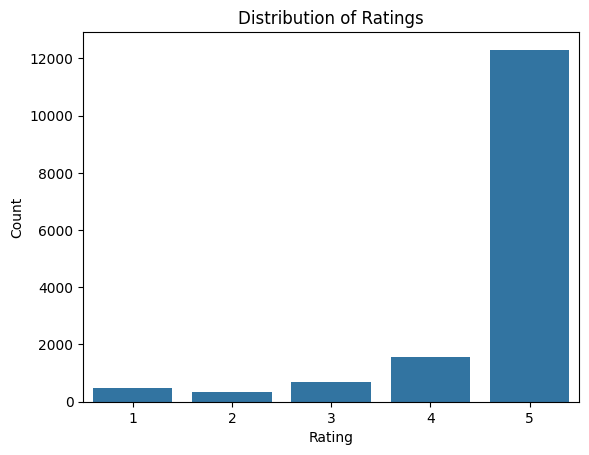

In [11]:
# Biểu đồ phân phối rating
sns.countplot(x='rating', data=eda_data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
def plot_sentiment_distribution(data_plot):
    plt.figure(figsize=(8, 6))
    label_percentage = data_plot['sentiment'].value_counts(normalize=True) * 100
    label_percentage.plot(kind='bar', color='skyblue')
    plt.title('Percentage Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage (%)')
    plt.grid(axis='x')
    plt.xticks(rotation=0)
    
    # Thêm tỷ lệ phần trăm vào mỗi thanh của biểu đồ
    for i, v in enumerate(label_percentage):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
    
    plt.show()

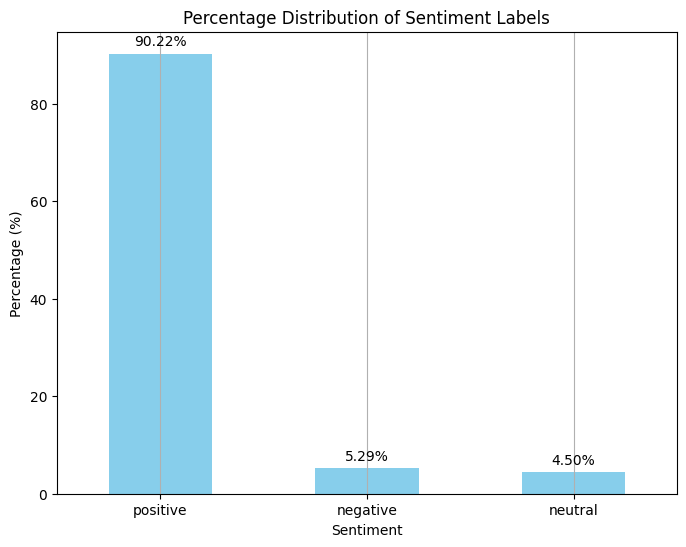

In [13]:
# Vẽ biểu đồ phân phối các nhãn
plot_sentiment_distribution(eda_data)

In [14]:
# Lọc dữ liệu có nhãn 'positive' (lấy 1500 dòng)
positive_data = eda_data[eda_data['sentiment'] == 'positive'].head(1500)

# Lọc dữ liệu có nhãn 'negative' và 'neutral' (lấy tất cả)
negative_neutral_data = eda_data[eda_data['sentiment'].isin(['negative', 'neutral'])]

# Kết hợp dữ liệu lại (1500 dòng positive và tất cả dòng negative/neutral)
eda_data = pd.concat([positive_data, negative_neutral_data])

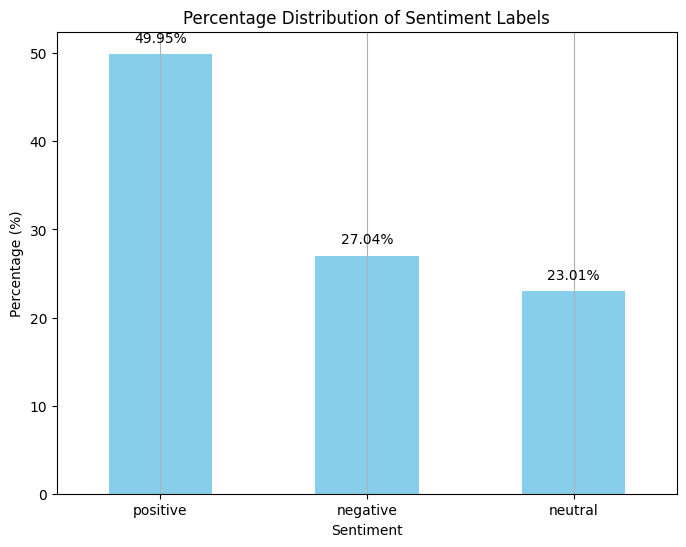

In [15]:
# Vẽ biểu đồ phân phối các nhãn
plot_sentiment_distribution(eda_data)

# **2. TEXT MINING**

In [16]:
# Kết hợp title và text thành review, làm sạch văn bản
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ dấu câu
    text = re.sub(r'\s+', ' ', text).strip().lower()  # Chuẩn hóa khoảng trắng và chữ thường
    return text

eda_data['review'] = (eda_data['title'] + ' ' + eda_data['text']).apply(clean_text)

In [18]:
# Lọc danh sách từ (giữ lại từ trong danh sách cho phép)
def filter_words(text, word_list_file = folder_path + 'TuDon.txt'):
    with open(word_list_file, 'r', encoding='utf-8') as f:
        word_list = set(f.read().splitlines())
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word in word_list]
    return ' '.join(filtered_tokens)

eda_data['filtered_review'] = eda_data['review'].apply(filter_words)

In [19]:
# Tokenize và loại bỏ stopwords
def process_text(text, stopword_file = folder_path + 'vietnamese-stopwords.txt'):
    with open(stopword_file, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())
    tokenized = ViTokenizer.tokenize(text)
    filtered = [word for word in tokenized.split() if word not in stopwords]
    return ' '.join(filtered)

eda_data['processed_review'] = eda_data['filtered_review'].apply(process_text)

In [20]:
# Tổng hợp dữ liệu sau xử lý
eda_data = eda_data[['sentiment', 'processed_review']].rename(columns={'processed_review': 'review'})

In [21]:
eda_data

,sentiment,review
0,positive,đêm ngủ nằm tôn đức thắng khu cao_cấp đối_diện...
4,positive,công_việc tiến_triển nghĩa_đen khách_sạn đẹp n...
8,positive,tuyệt_vời nghỉ_dưỡng quảng_ngãi dịp công_tác q...
9,positive,nghỉ_dưỡng tuyệt_vời khai_trương vắng_vẻ yên_t...
10,positive,địa_điểm lý_tưởng quảng_ngãi vô_tình ghé khách...
...,...,...
61927,neutral,ồn_ào gia_đình phòng thời_gian chúng_tôi tổ_ch...
62502,neutral,chỗ ok chỗ sạch_sẽ hòa không_khí tuy_nhiên chỗ...
62516,negative,kiểm_tra đi chúng_tôi du_lịch đồng_bằng sông c...
62611,negative,tiền vì_vậy giới_thiệu kiểm_tra đối_tác sống h...


# **3. TRỰC QUAN HÓA**

In [22]:
visual_data = eda_data.copy()

In [23]:
# Hàm tách từ và đếm số lần xuất hiện
def get_top_words(df, sentiment, top_n=10):
    # Lọc theo sentiment
    reviews = df[df["sentiment"] == sentiment]["review"]
    # Gộp tất cả các review lại
    all_words = " ".join(reviews).split()
    # Đếm số lần xuất hiện của từng từ
    word_counts = Counter(all_words)
    # Lấy top N từ xuất hiện nhiều nhất
    return word_counts.most_common(top_n)

In [25]:
# Vẽ biểu đồ
def plot_top_words(top_words, title):
    words, counts = zip(*[(word.replace("_", " "), count) for word, count in top_words])
    plt.barh(words, counts, color='skyblue')
    plt.xlabel("Số lần xuất hiện")
    plt.title(title)
    plt.gca().invert_yaxis()  # Đảo ngược trục y để từ nhiều xuất hiện trên cùng
    plt.show()

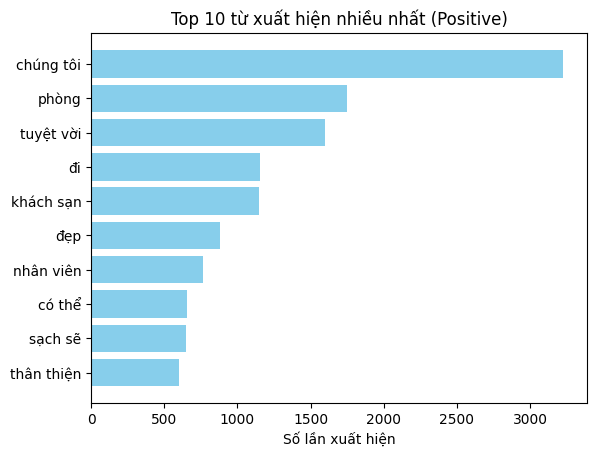

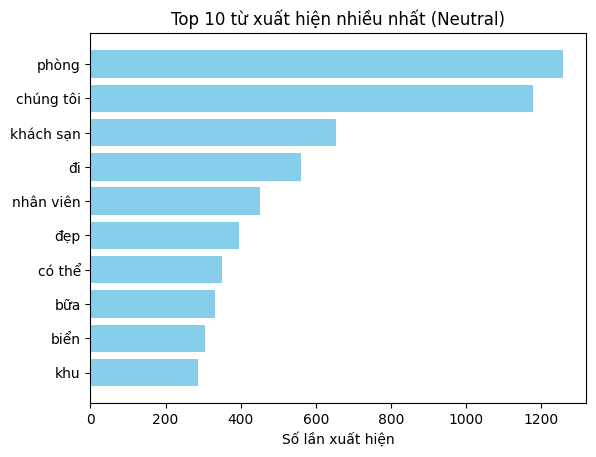

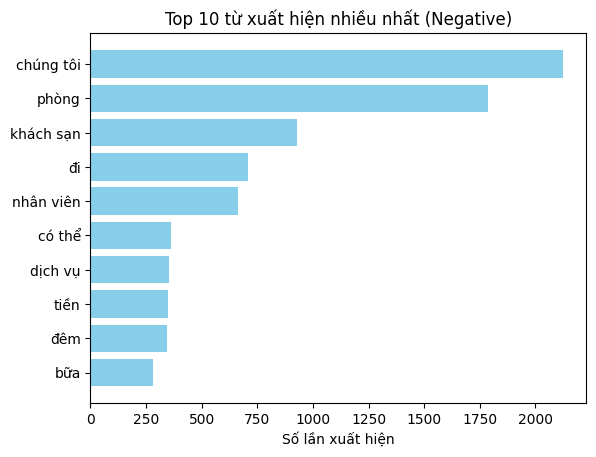

In [26]:
# Lấy top 10 từ cho mỗi sentiment
positive_top_words = get_top_words(visual_data, "positive")
neutral_top_words = get_top_words(visual_data, "neutral")
negative_top_words = get_top_words(visual_data, "negative")

# Vẽ biểu đồ cho sentiment
plot_top_words(positive_top_words, "Top 10 từ xuất hiện nhiều nhất (Positive)")
plot_top_words(neutral_top_words, "Top 10 từ xuất hiện nhiều nhất (Neutral)")
plot_top_words(negative_top_words, "Top 10 từ xuất hiện nhiều nhất (Negative)")

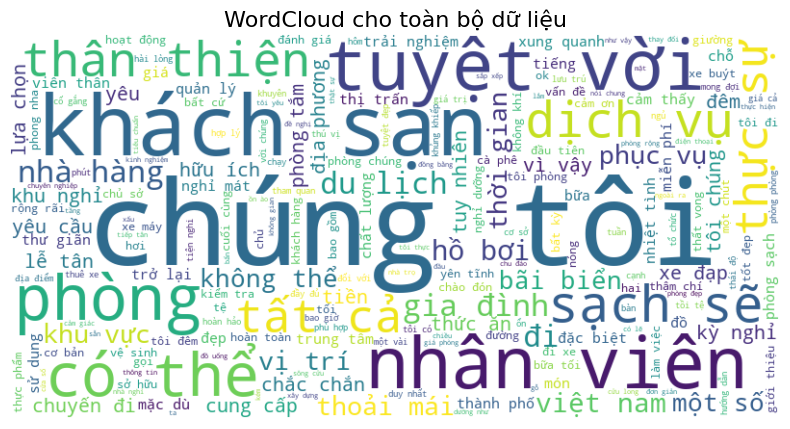

In [27]:
# Tạo WordCloud cho toàn bộ dữ liệu
def plot_wordcloud(df, column):
    # Lấy toàn bộ dữ liệu trong cột review, thay dấu _ bằng khoảng trắng
    text = " ".join(df[column]).replace("_", " ")
    # Tạo WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200
    ).generate(text)
    # Vẽ WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Ẩn trục
    plt.title("WordCloud cho toàn bộ dữ liệu", fontsize=16)
    plt.show()

# Gọi hàm để vẽ WordCloud
plot_wordcloud(visual_data, "review")

# **4. MODEL**

## **4.1. Chuẩn bị dữ liệu**

In [28]:
model_data = eda_data.copy()

In [29]:
# Chuẩn bị dữ liệu huấn luyện
X = model_data['review']
y = model_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Vector hóa dữ liệu
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
# Chuyển đổi TF-IDF từ sparse matrix sang dense array
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Mã hóa nhãn bằng LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## **4.2. Tạo các hàm cần thiết**

In [32]:
# Hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, labels=None, label_encoder=None, title='Confusion Matrix (%)'):
    # Nếu có label_encoder, chuyển đổi nhãn về dạng nguyên bản
    if label_encoder is not None:
        y_true = label_encoder.inverse_transform(y_true)
        y_pred = label_encoder.inverse_transform(y_pred)
    
    # Tạo ma trận nhầm lẫn
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100
    
    # Vẽ heatmap
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [33]:
# Huấn luyện và đánh giá các mô hình
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best Parameters: {grid.best_params_}")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, labels=grid.classes_)
    return best_model

## **4.3. Ba mô hình học máy**

### **Multinominal Logistic Regression**

Multinomial Logistic Regression:
Best Parameters: {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

    negative       0.82      0.79      0.80       165
     neutral       0.65      0.55      0.60       128
    positive       0.87      0.94      0.90       308

    accuracy                           0.82       601
   macro avg       0.78      0.76      0.77       601
weighted avg       0.81      0.82      0.81       601



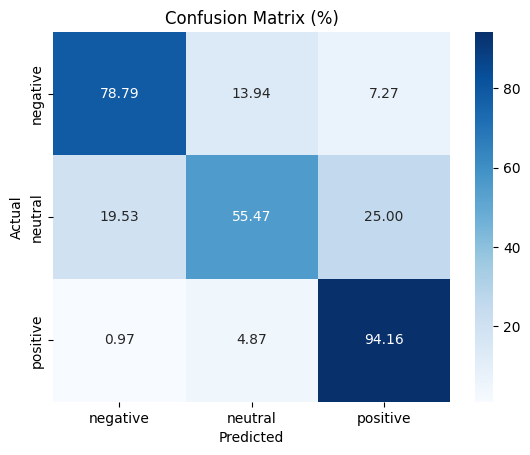

In [40]:
print("Multinomial Logistic Regression:")

# Các tham số riêng biệt
logistic_params = [{'C': [0.1, 1, 10], 'solver': ['lbfgs'], 'multi_class': ['multinomial'], 'max_iter': [100, 200]}]

best_multi_logistic = train_and_evaluate_model(LogisticRegression(), logistic_params, X_train_tfidf, y_train, X_test_tfidf, y_test)


### **Multinominal Naive Bayes**

Multinomial Naive Bayes:
Best Parameters: {'alpha': 0.1, 'fit_prior': False}
              precision    recall  f1-score   support

    negative       0.81      0.80      0.81       165
     neutral       0.70      0.35      0.47       128
    positive       0.80      0.97      0.88       308

    accuracy                           0.79       601
   macro avg       0.77      0.71      0.72       601
weighted avg       0.78      0.79      0.77       601



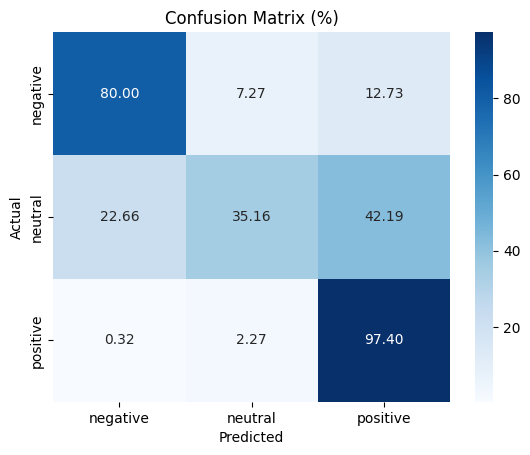

In [41]:
# Multinomial Naive Bayes
print("Multinomial Naive Bayes:")
nb_params = {'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]}
best_nb = train_and_evaluate_model(MultinomialNB(), nb_params, X_train_tfidf, y_train, X_test_tfidf, y_test)

### **Support Vector Machine**

Support Vector Machine:
Best Parameters: {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

    negative       0.84      0.80      0.82       165
     neutral       0.63      0.61      0.62       128
    positive       0.89      0.92      0.90       308

    accuracy                           0.82       601
   macro avg       0.79      0.78      0.78       601
weighted avg       0.82      0.82      0.82       601



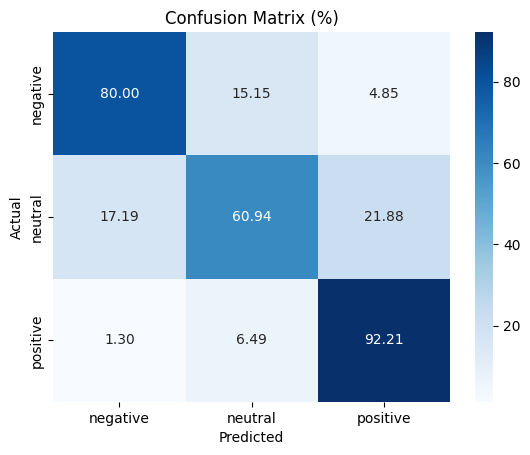

In [42]:
# SVM
print("Support Vector Machine:")
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
best_svm = train_and_evaluate_model(SVC(), svm_params, X_train_tfidf, y_train, X_test_tfidf, y_test)

### **Deep Learning - FNN**

In [120]:
# Tạo mô hình FNN (Feedforward Neural Network)
model_fnn = Sequential([
    Input(shape=(X_train_tfidf_dense.shape[1],)),  # Sử dụng Input thay vì input_dim
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Số lượng nhãn
])

# Biên dịch mô hình
model_fnn.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Huấn luyện mô hình
history = model_fnn.fit(
    X_train_tfidf_dense,
    y_train_encoded,
    validation_data=(X_test_tfidf_dense, y_test_encoded),
    epochs=20,
    batch_size=32
)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model_fnn.predict(X_test_tfidf_dense)
y_pred_labels = np.argmax(y_pred, axis=1)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.5103 - loss: 0.9991 - val_accuracy: 0.7737 - val_loss: 0.5712
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9358 - loss: 0.3112 - val_accuracy: 0.8070 - val_loss: 0.4586
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.8220 - val_loss: 0.4622
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8153 - val_loss: 0.4844
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8153 - val_loss: 0.5018
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 1.0000 - loss: 6.0380e-04 - val_accuracy: 0.8186 - val_loss: 0.5171
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 1.0000 - loss: 3.6904e-04 - val_accuracy: 0.8186 - val_loss: 0.5301
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 1.0000 - loss: 2.6250e-04 - val_accuracy

Feedforward Neural Network:
              precision    recall  f1-score   support

    negative       0.81      0.84      0.82       165
     neutral       0.66      0.51      0.57       128
    positive       0.87      0.94      0.91       308

    accuracy                           0.82       601
   macro avg       0.78      0.76      0.77       601
weighted avg       0.81      0.82      0.81       601



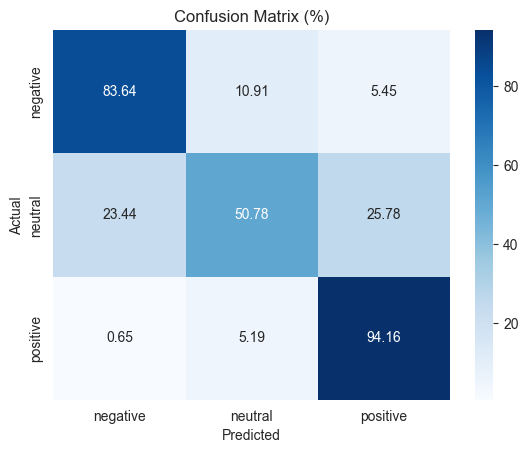

In [121]:
# In thông tin precision, recall, f1-score
print("Feedforward Neural Network:")
print(classification_report(y_test_encoded, y_pred_labels, target_names=label_encoder.classes_))

# Vẽ ma trận nhầm lẫn
plot_confusion_matrix(y_test_encoded, y_pred_labels, labels=label_encoder.classes_, label_encoder=label_encoder)

## **4.4. Kiểm tra mô hình**

In [139]:
def print_predictions(test_sentences, predictions, model_classes, model_name):
    """
    Hàm in kết quả dự đoán từ một mô hình.

    Args:
        test_sentences (list): Danh sách các câu cần dự đoán.
        predictions (list or numpy array): Nhãn dự đoán.
        model_classes (list or array): Danh sách các lớp nhãn (classes).
        model_name (str): Tên mô hình.
    """
    print(f"\nDự đoán với {model_name}:")
    
    # Nếu dự đoán là mảng một chiều (Logistic Regression, Naive Bayes, SVM)
    if predictions.ndim == 1:
        predicted_labels = predictions
    else:
        # Nếu dự đoán là mảng xác suất (FNN)
        predicted_labels = np.argmax(predictions, axis=1)
    
    # Nếu các dự đoán là nhãn (chuỗi), ta cần chuyển thành chỉ số
    if isinstance(predicted_labels[0], str):
        predicted_labels = [np.where(model_classes == label)[0][0] for label in predicted_labels]

    for sentence, label in zip(test_sentences, predicted_labels):
        print(f'Câu: "{sentence}" --> Dự đoán: {model_classes[label]}')


In [140]:
# Câu cần kiểm tra
test_sentences = ["Tốt.",
                  "Xấu."]

# Vector hóa câu test
X_test_sample_tfidf = vectorizer.transform(test_sentences)
X_test_sample_tfidf_array = X_test_sample_tfidf.toarray()

In [141]:
# Dự đoán với Logistic Regression
logistic_predictions = best_multi_logistic.predict(X_test_sample_tfidf)
print_predictions(test_sentences, logistic_predictions, best_multi_logistic.classes_, "Logistic Regression")

# Dự đoán với Multinomial Naive Bayes
nb_predictions = best_nb.predict(X_test_sample_tfidf)
print_predictions(test_sentences, nb_predictions, best_nb.classes_, "Multinomial Naive Bayes")

# Dự đoán với SVM
svm_predictions = best_svm.predict(X_test_sample_tfidf)
print_predictions(test_sentences, svm_predictions, best_svm.classes_, "SVM")

# Dự đoán với FNN
predictions = model_fnn.predict(X_test_sample_tfidf_array)
predicted_labels = np.argmax(predictions, axis=1)
model_classes = label_encoder.classes_
print_predictions(test_sentences, predicted_labels, model_classes, "FNN")



Dự đoán với Logistic Regression:
Câu: "Tốt." --> Dự đoán: positive
Câu: "Xấu." --> Dự đoán: negative

Dự đoán với Multinomial Naive Bayes:
Câu: "Tốt." --> Dự đoán: negative
Câu: "Xấu." --> Dự đoán: negative

Dự đoán với SVM:
Câu: "Tốt." --> Dự đoán: negative
Câu: "Xấu." --> Dự đoán: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Dự đoán với FNN:
Câu: "Tốt." --> Dự đoán: negative
Câu: "Xấu." --> Dự đoán: negative
